In [1]:
import numpy as np
from scipy.special import owens_t
import matplotlib.pyplot as plt
# get a logger
import logging
logger = logging.getLogger(__name__)
from ERM import fair_adversarial_error_erm
from state_evolution import OverlapSet, fair_adversarial_error_overlaps
%load_ext autoreload
%autoreload 2
from scipy.integrate import quad, dblquad

In [9]:
from data_model import KFeaturesModel
d = 1000
idx_0 = 0
idx_2 = 700
tau = 0
feature_ratios = np.array([0.5,0.5])
features_x = np.array([10,1])
features_theta = np.array([1,10])
data_model = KFeaturesModel(d, logger, delete_existing=True,source_pickle_path="",feature_ratios=feature_ratios,features_x=features_x,features_theta=features_theta)
# data_model.Sigma_x = data_model.Sigma_x / np.trace(data_model.Sigma_x) * d
spec_Sigma_x = np.linalg.eigvals(data_model.Sigma_x)
data_model.rho = np.mean(spec_Sigma_x * data_model.theta**2) 
data_set = data_model.generate_data(100000,tau)

In [10]:
def noise_contribution(rho: float, tau: float) -> float:
    if tau == 0:
        tau = 1e-10
    return 0.5 - np.arctan( np.sqrt( rho / tau**2 ) ) / np.pi

In [11]:
# now create noisy labels to compare ourselves to
def noisy_labels(data_set, tau):
    labels = data_set.y
    noise = np.random.normal(0, 1, labels.shape) * tau
    activations = data_set.X @ data_model.theta / np.sqrt(d)
    noisy_labels = np.sign(activations + noise)
    return noisy_labels

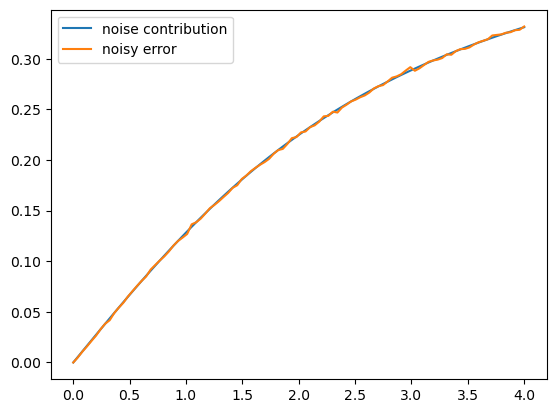

In [12]:
taus = np.linspace(0, 4, 100)
noise_contributions = np.array([noise_contribution(data_model.rho, tau) for tau in taus])
noisy_error = np.array([np.mean(noisy_labels(data_set, tau) != data_set.y) for tau in taus])

plt.plot(taus, noise_contributions, label="noise contribution")
plt.plot(taus, noisy_error, label="noisy error")
plt.legend()
plt.show()